## Task 1: Problem: Smoke Detection

    I would like to solve better smoke detection using logistic regression. Currently there are two major competing types of smoke detectors, photoelectric smoke detectors that rely on shining a source of light through the air onto on a photosensor and ionization smoke detectors that ionize the air and measure the electrical resistance of the air that fluctuates based on particulates (such as smoke). Both are highly effective simple devices, however, there is still room for improvement as false alarms and late detections are still open issues with these devices. 

    More complex devices may solve these issues by intergrating multiple sensors to detect fires with higher accuracy and not accidentally trigger with things like cooking smoke or water vapor. These multi-sensor devices are perfect for logisitc regression based classifiers as the models can be easily trained, verified, and most importantly the trained model can run on an intergrated circuit such as the ones used in smoke detectors.


### I Will use the following dataset to build a classifier to detect fire based on multiple sensors
https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset


## Task 2: Exploratory Data Analysis (EDA)





In [1]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First Reading in the data and seeing what each column represents with a sample of the data. It seems that there are lots of different sensor data at various scales with a single feild for whether the smoke detector should sound an alarm or not.

In [3]:
filename = "smoke_detection_iot.csv"
sd_data = pd.read_csv(filename)
sd_data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Next reading additional information about the datatypes to expect for each attribute of the dataset to get an idea of what should be used in the regression model.

In [4]:
sd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


These basic statistics show that luckily no data is missing however looking at the last column this dataset is heavily skewed to positive results which will impact the peformance of my model. Also, this data reveals three attributes must be dropped before training the model, specifically, unnamed (index), UTC, and CNT as they are metadata for each sample.

In [5]:
sd_data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Next I convert the data to a numpy vector to investigate the data imbalance and correlations.

In [6]:
sd_vector = sd_data.to_numpy()
print("Size of data: ",sd_vector.shape)
print(f"{np.sum(sd_vector[:,-1])} Positive cases")
print(f"{sd_vector.shape[0] - np.sum(sd_vector[:,-1])} Negative cases")

Size of data:  (62630, 16)
44757.0 Positive cases
17873.0 Negative cases


In [7]:
variable = sd_vector[:,2:]
correlations = np.corrcoef(variable,rowvar=False)
print(correlations.min())
print(np.sum(np.abs(correlations),axis=0))
corr = sd_data.iloc[:,2:].corr()
corr.style.background_gradient(cmap='coolwarm')

-0.6827849350857352
[2.24936817 4.74989946 6.55421094 6.73203998 6.0819111  5.92874849
 4.51217174 7.71224266 7.22136849 7.42731369 7.16285979 6.32325915
 3.33446689 3.71083714]


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741,-0.128118


From this data it seems that using many variables may be helpful as no single value heavily co-orelate with the desired result of sounding the fire alarm. On top of this the particle size counts seem highly intercoorelated indicating that air particles of all sizes tend to exist together. From this I decided to train my model on all relevent data (exluding CNT) to see what a full regression would learn. In the future I could likely drop the distintions of particle size measurements to see how much it would affect the model's accuracy.

## Task 3 (35 points): Implement, Logistic Regression in this step.
This section will be implementing the vanilla batch gradient descent aswell as stochastic gradient descent.

The Model for Logistic Regression:
$$A = \sigma(\textbf{w}^Tx + b)$$
Where $\sigma$ is the sigmoid activation function

Element wise Cross-Entropy loss function:
$$L = -\frac{1}{n}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$$
Derivative with respect to weights:
$$\frac{\partial L}{\partial w} = \frac{1}{n}X(A-Y)^T$$
Derivative with respect to biases:
$$\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n (a^{(i)}-y^{(i)})$$

### First starting with batch gradient descent:

In [8]:
def preprocess(sd_vector):
    # 80% train 20% test split
    train_size = int(sd_vector.shape[0]*0.8)
    x = sd_vector[:,2:-2] 
    # normalize data
    x = (x-np.mean(x,axis=0))/(np.std(x,axis=0))
    y = sd_vector[:,-1]
    return x[:train_size].copy(),y[:train_size].copy(),x[train_size:].copy(),y[train_size:].copy()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def test(X,Y,w,b):
    print("RUNNING FINAL TEST")
    Pred = sigmoid(X @ w + b)
    print("Total Correct: ",(np.rint(Pred)==Y).sum())
    print(f"Accuracy : {100*np.sum(np.rint(Pred)==Y)/n:0.2f}%")
    print(f"Loss: {-np.mean(Y * np.log(Pred) + (1-Y) * (np.log(1-Pred)))}")
    
    

Data (50104, 12)
Labels (50104,)
n_parameters: 12


~Epoch 0~
Cost: 0.6931471805599452
NUM CORRECT:  6389
Accuracy : 12.75%
~Epoch 2~
Cost: 0.6572152087518431
NUM CORRECT:  43665
Accuracy : 87.15%
~Epoch 4~
Cost: 0.6259102559830173
NUM CORRECT:  43665
Accuracy : 87.15%
~Epoch 6~
Cost: 0.5985693946009314
NUM CORRECT:  43665
Accuracy : 87.15%
~Epoch 8~
Cost: 0.5746194439043134
NUM CORRECT:  43665
Accuracy : 87.15%
~Epoch 10~
Cost: 0.5535698363694208
NUM CORRECT:  43665
Accuracy : 87.15%
~Epoch 12~
Cost: 0.5350031766198041
NUM CORRECT:  43664
Accuracy : 87.15%
~Epoch 14~
Cost: 0.5185654934202822
NUM CORRECT:  43664
Accuracy : 87.15%
~Epoch 16~
Cost: 0.5039570771488442
NUM CORRECT:  43662
Accuracy : 87.14%
~Epoch 18~
Cost: 0.4909242585605846
NUM CORRECT:  43662
Accuracy : 87.14%
~Epoch 20~
Cost: 0.47925222863613903
NUM CORRECT:  43662
Accuracy : 87.14%
~Epoch 22~
Cost: 0.46875887495681945
NUM CORRECT:  43660
Accuracy : 87.14%
~Epoch 24~
Cost: 0.4592895512748117
NUM CORRECT:  43657
Accuracy

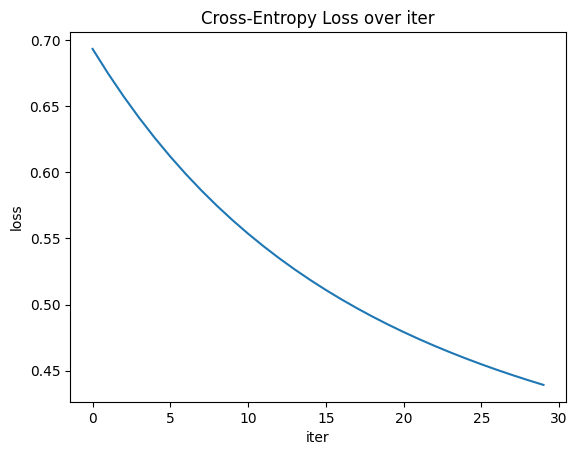

In [73]:
learning_rate = 0.1
epochs = 30
X,Y, X_t, Y_t = preprocess(sd_vector)
n, m = X.shape

print("Data",X.shape)
print("Labels",Y.shape)

#np.random.seed(2000)
n_parameters = m
print(f"n_parameters: {n_parameters}")

# Random and zero initializations were tried for this model
#w = np.random.uniform(-1,1,n_parameters)
#b = np.random.uniform(-1,1,1)
w = np.zeros(n_parameters)
b = 0

print("\n")
# Batch Gradient Decsent
losses = []
for i in range(epochs):
    A = sigmoid(w @ X.T + b)
    loss = -np.mean(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    losses.append(loss)
    diff = (A-Y)  
    dw = (X.T @ diff.T )/n
    db= np.sum(diff)/n

    w = w - learning_rate*dw
    b= b - learning_rate*db
    if i%2 == 0:
        print(f"~Epoch {i}~")
        print(f"Cost: {loss}")
        print("NUM CORRECT: ",np.sum(np.rint(A)==Y))
        print(f"Accuracy : {100*np.sum(np.rint(A)==Y)/n:0.2f}%")

print(f"Final Weights: {w}")
print(f"Final Bias: {b}")
test(X_t,Y_t,w,b)
plt.plot(losses)
plt.xlabel("iter")
plt.ylabel("loss")
plt.title("Cross-Entropy Loss over iter")
plt.show()

As we can see the batch gradient gradually reduces the loss with each update of the weights and biases. Looking at each weight for the input data it seems to align with the positive and negative co-relations found in the data exploration so the model is learning properly. However, the accuracy does not get better as this dataset is heavily skewed to the positive result the model simply outputs positive much more often.

### Now implementing Stochastic Gradient Descent:

~Epoch 0~
Cost: 0.6629776747305086
NUM CORRECT:  6389
Accuracy : 12.75%
~Epoch 2~
Cost: 0.6221187675191387
NUM CORRECT:  6389
Accuracy : 12.75%
~Epoch 4~
Cost: 0.5929829379530674
NUM CORRECT:  6389
Accuracy : 12.75%
RUNNING FINAL TEST
Total Correct:  2527
Accuracy : 5.04%
Loss: 0.7059859770203689
Mean Prediction: 0.46624248329472734
Prediction std: 0.016311795895348213
Final Weights: [-0.00792004 -0.02265203  0.00695487  0.0039634   0.05861691  0.04479344
 -0.02331163  0.00305044  0.00261116  0.00322308  0.00257154  0.002067  ]
Final Bias: -0.027974548997683465


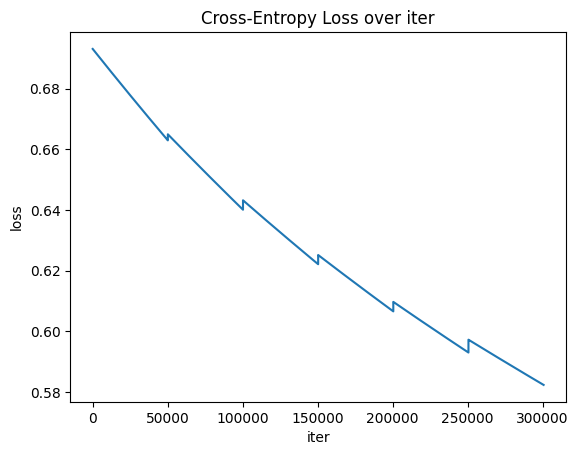

In [21]:
"""Pred = sigmoid(X @ w + b)
Pred = np.rint(Pred)
print(Pred.sum())
print((Pred==Y).sum())"""
learning_rate = .01
epochs = 6

# Train and test split
X,Y, X_t, Y_t = preprocess(sd_vector)
n, m = X.shape
w = np.zeros(m)
b = 0

# Stochastic model with one input at a time (in the future shuffle input data)
losses = []
preds = []
for i in range(epochs):
    for j in range(n):
        x = X[i] 
        y = Y[i]
        A = sigmoid(w @ x + b)
        preds.append(A)
        loss = -np.mean(y * np.log(A) + (1-y) * (np.log(1-A)))
        losses.append(loss)
        diff = (A-y)  
        dw = (x * diff )/n
        db= np.sum(diff)/n

        w = w - learning_rate*dw
        b= b - learning_rate*db
    if i%2 == 0:
        print(f"~Epoch {i}~")
        print(f"Cost: {loss}")
        print("NUM CORRECT: ",np.sum(np.rint(A)==Y))
        print(f"Accuracy : {100*np.sum(np.rint(A)==Y)/n:0.2f}%")
        
test(X_t,Y_t,w,b)
preds = np.asarray(preds)
print(f"Mean Prediction: {preds.mean()}")
print(f"Prediction std: {preds.std()}")
print(f"Final Weights: {w}")
print(f"Final Bias: {b}")
plt.plot(losses)
plt.xlabel("iter")
plt.ylabel("loss")
plt.title("Cross-Entropy Loss over iter")
plt.show()

After trianing the two models which both seemed to improperly fit the data despite the loss going down (low accuracy) it seems the data skew may have to be delt with in future iterations or the dataset may have non linear relationships a simple regression model may not be able to properly represent such as if tempreature and humidity nonlinearly corelate with air particulate. 

## Task 4: 2 additional optimization algorithms
In this section I will compare the previous batch sgd and stochastic sgd with the Adam and AdaMax optimizers. I will be using the Tensorflow package to do this.


In [68]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
# Training adam model
adam_model = Sequential()
adam_model.add(Dense(1, activation ="sigmoid",input_shape=(m,)))
adam_model.compile(optimizer='adam', loss = 'binary_crossentropy')


adam_model.fit(X,Y, epochs=5)

Epoch 1/5
1566/1566 [==============================] - 2s 997us/step - loss: 0.3870
Epoch 2/5
1566/1566 [==============================] - 2s 977us/step - loss: 0.2752
Epoch 3/5
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2374
Epoch 4/5
1566/1566 [==============================] - 1s 938us/step - loss: 0.2154
Epoch 5/5
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2017


In [71]:
# Evaluating Adam
A = adam_model(X_t)
A = np.squeeze(A)
print(np.mean(A), np.max(A))
print(Y_t.shape)
print((np.rint(A)==Y_t).shape)

print("Total Correct: ",np.sum(np.rint(A)==Y_t))
print(f"Accuracy : {100*np.sum(np.rint(A)==Y_t)/Y_t.shape[0]:0.2f}%")
print(f"Loss: {-np.mean(Y_t * np.log(A+0.000001) + (1-Y_t) * (np.log(1-A+0.000001)))}")

0.33073106 0.9999998
(12526,)
(12526,)
Total Correct:  9166
Accuracy : 73.18%
Loss: 1.573156853842933


In [66]:
# Training Adamax
AdaMax = Sequential()
AdaMax.add(Dense(1, activation ="sigmoid",input_shape=(m,)))
AdaMax.compile(optimizer='adamax', loss = 'binary_crossentropy')
AdaMax.fit(X,Y, epochs=10)


Epoch 1/10
1566/1566 [==============================] - 2s 993us/step - loss: 0.4850
Epoch 2/10
1566/1566 [==============================] - 2s 975us/step - loss: 0.3261
Epoch 3/10
1566/1566 [==============================] - 2s 987us/step - loss: 0.2891
Epoch 4/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2681
Epoch 5/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2530
Epoch 6/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2411
Epoch 7/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2320
Epoch 8/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2242
Epoch 9/10
1566/1566 [==============================] - 2s 1ms/step - loss: 0.2174
Epoch 10/10
1566/1566 [==============================] - 2s 979us/step - loss: 0.2114


In [67]:
# Evaluating Adamax
A = AdaMax(X_t)
A = np.squeeze(A)
print("Total Correct: ",np.sum(np.rint(A)==Y_t))
print(f"Accuracy : {100*np.sum(np.rint(A)==Y_t)/Y_t.shape[0]:0.2f}%")
print(f"Loss: {-np.mean(Y_t * np.log(A+0.000001) + (1-Y_t) * (np.log(1-A+0.000001)))}")

Total Correct:  9125
Accuracy : 72.85%
Loss: 1.8674985875581587


## Conclusion

In the end it seems that Adam and AdaMax performed similarly on this dataset and acheived around ~73% accuracy which outperformed both previous standard sgd implementations. Unlike the prior models these seemed to overfit however I would like to additionally test my implementation to ensure this is a difference between the approaches and not some implementation oversight. With this in mind it is still questionable whether ~73% accuracy is sufficient for this highly critical application of smoke detection. On this initial attempt it seems that logistic regression may not be the solution to this problem as the accuracies should be far higher for something as life critical as smoke detection. Adam and Adamax optimizers had far better success in not overfitting the data while providing reasonable accuarate results followed by batch sgd and finally in last stochasitc gradient descent. This approach may prove itself more promising with more fine tuning or different optimization techniques, however, from the above results I would not reccomend logistic regression for solving this problem.